In [13]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad


In [14]:

# Set random seed for reproducibility
np.random.seed(42)

# Create an AnnData object
adata = sc.AnnData()

# Define the number of cells and genes
n_cells = 1000
n_genes = 100

# Simulate gene expression data
gene_expression_data = np.random.gamma(shape=1, scale=1, size=(n_cells, n_genes))

# Create an AnnData object with the simulated data
adata = sc.AnnData(X=gene_expression_data)


print(adata)

AnnData object with n_obs × n_vars = 1000 × 100


In [15]:
np.random.seed(42)

# Generate gene expression data for 10 genes from a cosine wave
n_cells = adata.shape[0]
n_new_genes = 50
new_gene_names = [f'NewGene_{i}' for i in range(n_genes+1, n_genes+n_new_genes + 1)]

# Create a cosine wave for each gene
gene_expression_data = np.zeros((n_cells, n_new_genes))
for i in range(n_new_genes):
    # phase = np.random.uniform(0, 2 * np.pi)
    if i < n_new_genes/2:
        phase = np.random.uniform(0, 1)
    else:
        phase = np.random.uniform(np.pi, np.pi+1)
    amp = np.random.uniform(3, 10)
    noise = np.random.normal(0, 1, n_cells)
    freq = np.pi*2/n_cells
    gene_expression_data[:, i] = amp * np.cos(freq * np.arange(n_cells) + phase)+noise



# Create a new AnnData object for the new genes
new_genes_adata = ad.AnnData(X=gene_expression_data, var=pd.DataFrame(index=new_gene_names))

# Concatenate the new genes with the existing adata
adata2 = ad.concat([adata, new_genes_adata], axis = 1)

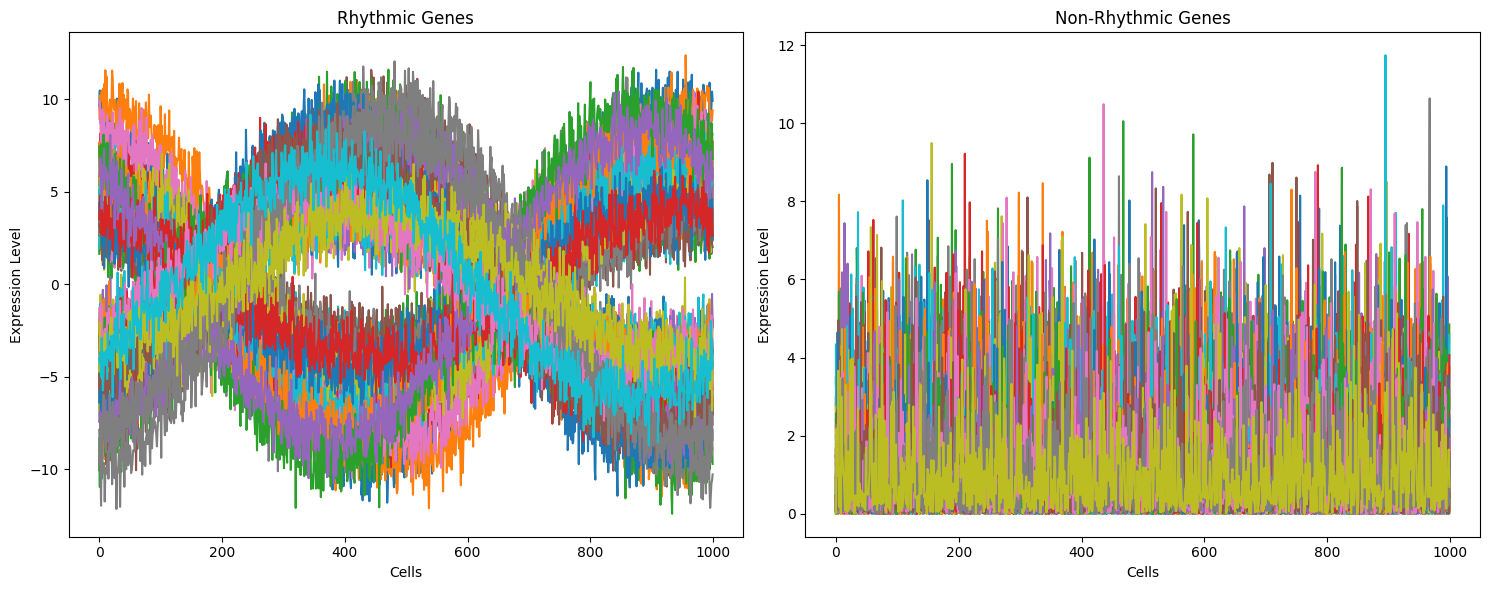

In [16]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot rhythmic genes
axes[0].set_title('Rhythmic Genes')
for i in range(n_genes, n_genes+n_new_genes):
    axes[0].plot( adata2.X[:, i], label=f'Gene_{i + 1}')
axes[0].set_xlabel('Cells')
axes[0].set_ylabel('Expression Level')

# Plot non-rhythmic genes
axes[1].set_title('Non-Rhythmic Genes')
for i in range(0, n_genes-1):
    axes[1].plot(adata2.X[:, i], label=f'Gene_{i + 1}')
axes[1].set_xlabel('Cells')
axes[1].set_ylabel('Expression Level')
#axes[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

/Users/henryhollis/opt/anaconda3/envs/native/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/henryhollis/opt/anaconda3/envs/native/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/henryhollis/opt/anaconda3/envs/native/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vec

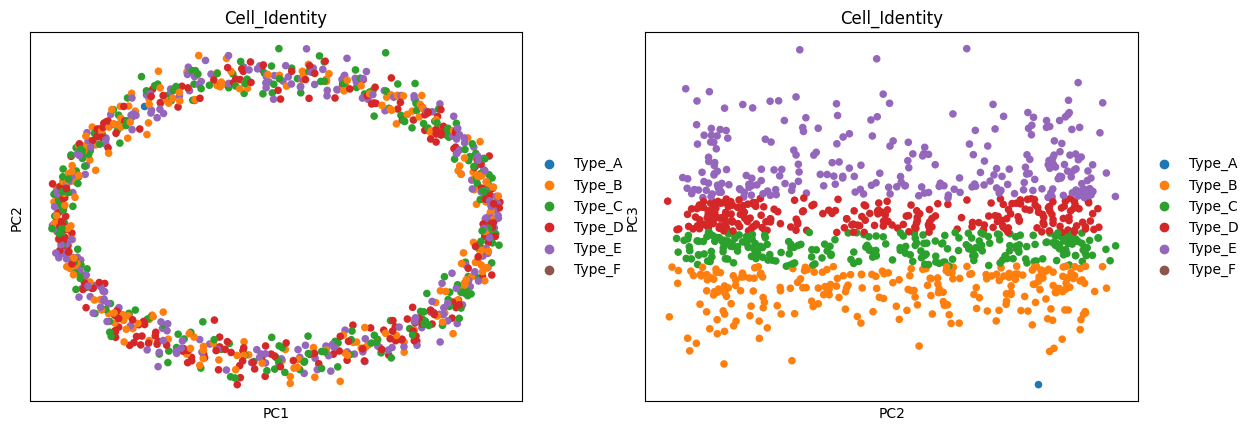

In [17]:
# Perform PCA
sc.tl.pca(adata2)

# Generate random cell identities
#cell_identities = np.random.choice(['Type_A', 'Type_B', 'Type_C'], size=adata2.shape[0])

# Determine quantiles based on PC3 values
quantiles = np.percentile(adata2.obsm['X_pca'][:, 2], [0, 25, 50, 75, 100])
pd.cut(adata2.varm['PCs'][:, 2], bins=[-np.inf] + list(quantiles) + [np.inf], labels=['Type_A', 'Type_B', 'Type_C', 'Type_D', 'Type_E','Type_F'])


# Assign cell identities based on quantiles
cell_identities = pd.cut(adata2.obsm['X_pca'][:, 2], bins=[-np.inf] + list(quantiles) + [np.inf], labels=['Type_A', 'Type_B', 'Type_C', 'Type_D', 'Type_E','Type_F'])


# Add the 'Cell_Identity' column to adata.obs
adata2.obs['Cell_Identity'] = cell_identities
adata2.obs['time'] = np.arange(0, n_cells)
# Specify the PCs you want to plot (e.g., PC2, PC3)
pcs_to_plot = ['1,2', '2,3']

# Plot PCA for the selected PCs
sc.pl.pca(adata2, color='Cell_Identity', components=pcs_to_plot, show=True)

In [18]:

# Preprocess the data (e.g., log-transform and scale)
sc.pp.scale(adata2)

# Calculate the neighborhood graph
sc.pp.neighbors(adata2, n_neighbors=4, n_pcs=10)  # Adjust parameters as needed
# Perform Louvain clustering
sc.tl.louvain(adata2, resolution=1.0)  # You can adjust the 'resolution' parameter

# Print the cluster assignments in the 'louvain' category of adata.obs
print(adata2.obs['louvain'])

0      4
1      4
2      4
3      4
4      4
      ..
995    4
996    4
997    4
998    4
999    4
Name: louvain, Length: 1000, dtype: category
Categories (18, object): ['0', '1', '2', '3', ..., '14', '15', '16', '17']


/Users/henryhollis/opt/anaconda3/envs/native/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/henryhollis/opt/anaconda3/envs/native/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


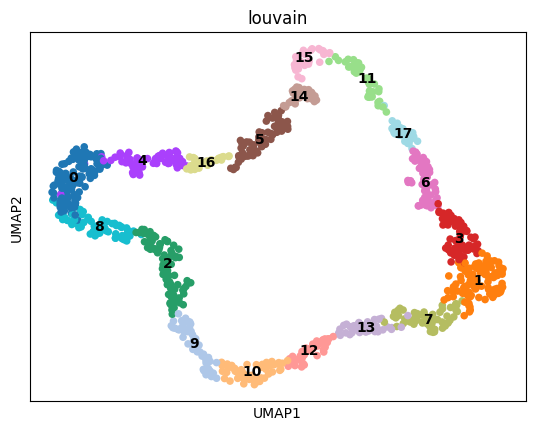

/Users/henryhollis/opt/anaconda3/envs/native/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/henryhollis/opt/anaconda3/envs/native/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


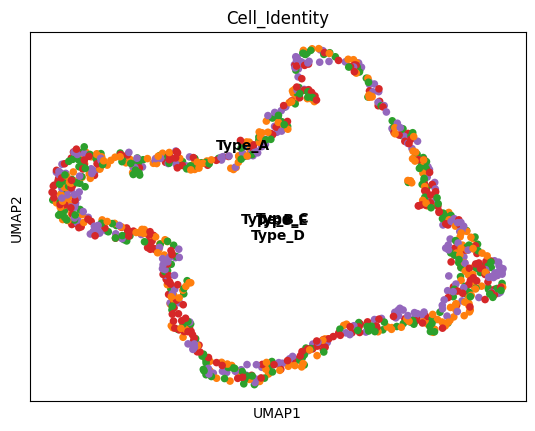

In [19]:
# Assuming you have an 'adata' object with Louvain cluster assignments

# Calculate UMAP
sc.tl.umap(adata2)

# Plot UMAP with Louvain clusters
sc.pl.umap(adata2, color='louvain', legend_loc='on data')
sc.pl.umap(adata2, color='Cell_Identity', legend_loc='on data')
